# Gerando dados de teste
* Mais detalhes estão disponíveis em
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

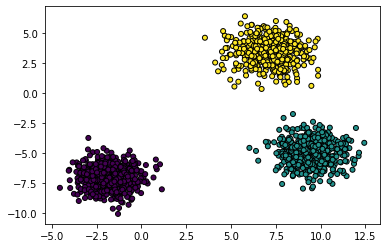

In [40]:
from sklearn import datasets
import matplotlib.pyplot as plt

x, y = datasets.make_blobs( n_samples=1500, n_features=2, centers=3 )

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k" )
plt.show()

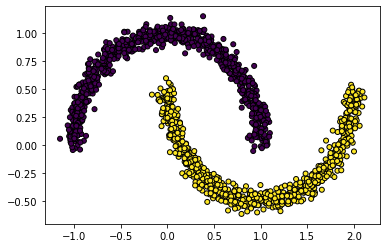

In [16]:
xl, yl = datasets.make_moons(n_samples=1500, noise=0.05)

plt.scatter( xl[:, 0], xl[:, 1], marker="o", c=yl, s=25, edgecolor="k" )
plt.show()

# KMeans

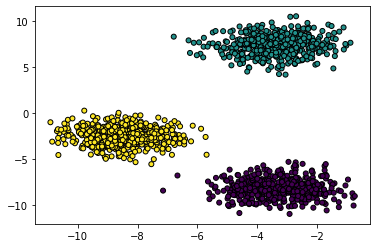

In [2]:
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans( n_clusters=3, batch_size=10 )
y_kmeans = kmeans.fit_predict(x)

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y_kmeans, s=25, edgecolor="k" )
plt.show()

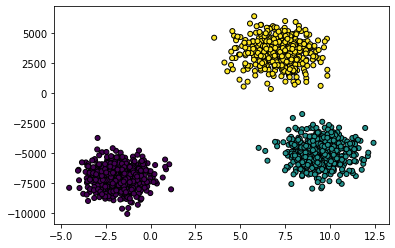

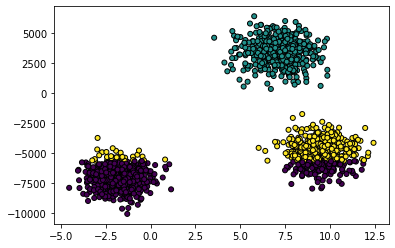

In [41]:
import numpy as np

x_aux = np.array(x)
x_aux[:,1] = 1000.0*x_aux[:,1]

plt.scatter( x_aux[:, 0], x_aux[:, 1], marker="o", c=y, s=25, edgecolor="k" )
plt.show()

kmeans = cluster.MiniBatchKMeans( n_clusters=3, batch_size=10 )
y_kmeans = kmeans.fit_predict(x_aux)

plt.scatter( x_aux[:, 0], x_aux[:, 1], marker="o", c=y_kmeans, s=25, edgecolor="k" )
plt.show()

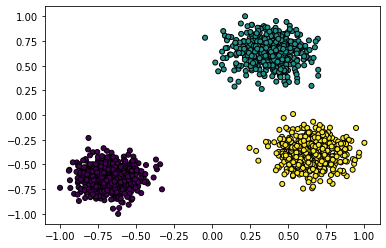

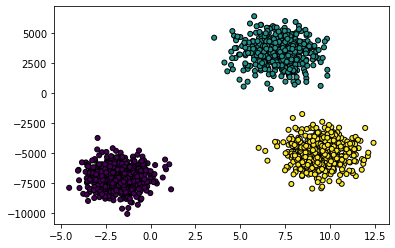

In [42]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
xn = scaler.fit_transform( x_aux )

y_kmeans = kmeans.fit_predict( xn )

plt.scatter( xn[:, 0], xn[:, 1], marker="o", c=y_kmeans, s=25, edgecolor="k" )
plt.show()

x_corrigido = scaler.inverse_transform(xn)

plt.scatter( x_corrigido[:, 0], x_corrigido[:, 1], marker="o", c=y_kmeans, s=25, edgecolor="k" )
plt.show()

# Aglomerativo

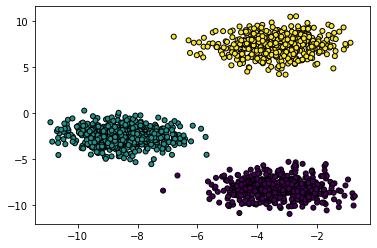

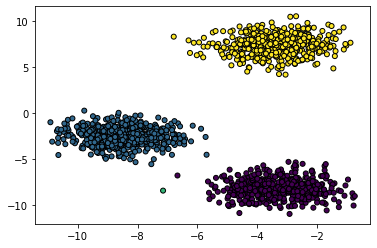

In [9]:
modelo = cluster.AgglomerativeClustering( n_clusters=4, linkage="single", affinity="euclidean" )

y_predito = modelo.fit_predict( x )

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k" )
plt.show()

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y_predito, s=25, edgecolor="k" )
plt.show()

# DBScan

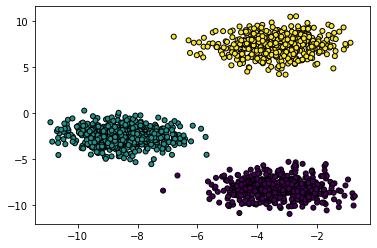

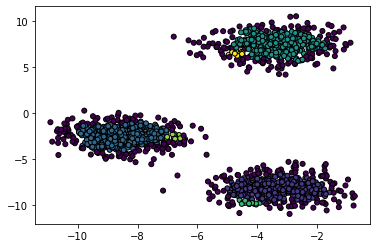

In [11]:
modelo = cluster.DBSCAN( eps=0.3, min_samples=10 )

y_predito = modelo.fit_predict( x )

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k" )
plt.show()

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y_predito, s=25, edgecolor="k" )
plt.show()

In [13]:
set(modelo.labels_)

{-1, 0, 1, 2, 3, 4, 5}

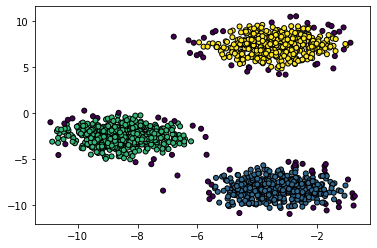

{-1, 0, 1, 2}

In [15]:
modelo = cluster.DBSCAN( eps=0.5, min_samples=10 )

y_predito = modelo.fit_predict( x )

plt.scatter( x[:, 0], x[:, 1], marker="o", c=y_predito, s=25, edgecolor="k" )
plt.show()

set(modelo.labels_)


KMeans


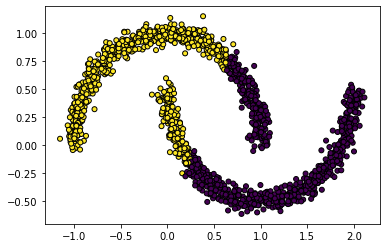

Aglomerativo


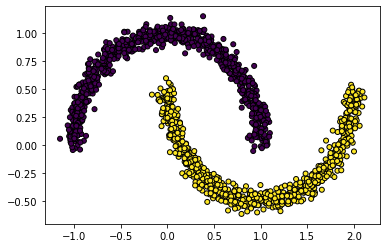

DBSCAN


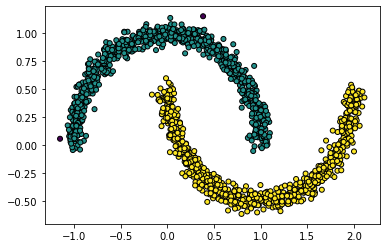

In [23]:
modeloKMeans = cluster.MiniBatchKMeans( n_clusters=2, batch_size=10 )
modeloAC = cluster.AgglomerativeClustering( n_clusters=2, linkage="single", affinity="euclidean" )
modeloDBS = cluster.DBSCAN( eps=0.1, min_samples=10 )

ykm = modeloKMeans.fit_predict(xl)
yac = modeloAC.fit_predict(xl)
ydbs = modeloDBS.fit_predict(xl)

print("KMeans")

plt.scatter( xl[:, 0], xl[:, 1], marker="o", c=ykm, s=25, edgecolor="k" )
plt.show()

print("Aglomerativo")

plt.scatter( xl[:, 0], xl[:, 1], marker="o", c=yac, s=25, edgecolor="k" )
plt.show()

print("DBSCAN")

plt.scatter( xl[:, 0], xl[:, 1], marker="o", c=ydbs, s=25, edgecolor="k" )
plt.show()

# OPTICS

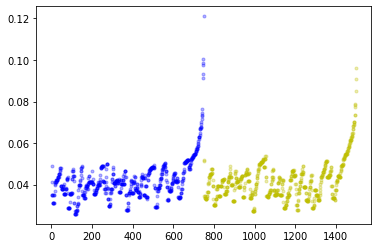

{0, 1}


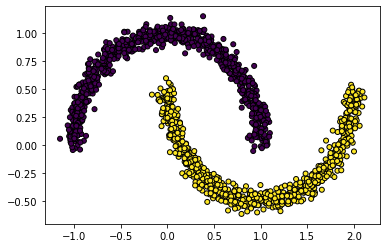

In [39]:
import numpy as np

modelo = cluster.OPTICS( min_samples=10, max_eps=0.2, xi=0.2 )
y_predito = modelo.fit_predict(xl)

space = np.arange(len(xl))
reachability = modelo.reachability_[ modelo.ordering_ ]
labels = modelo.labels_[ modelo.ordering_ ]

colors = [ "b.", "y.", "r.", "g.", "c." ]
for klass, color in zip( range(0, 5), colors ):
  Xk = space[ labels == klass ]
  Rk = reachability[ labels==klass ]
  plt.plot(Xk, Rk, color, alpha=0.3)

plt.plot( space[ labels == -1 ], reachability[ labels==-1 ], "k.", alpha=0.3 )

plt.show()

print(set(labels))

plt.scatter( xl[:, 0], xl[:, 1], marker="o", c=y_predito, s=25, edgecolor="k" )
plt.show()

# Avaliação dos Agrupamentos

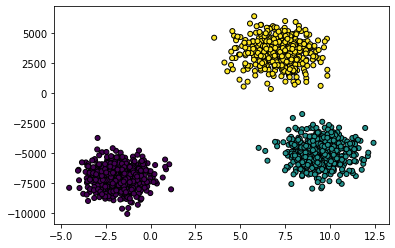

In [43]:
plt.scatter( x_aux[:, 0], x_aux[:, 1], marker="o", c=y, s=25, edgecolor="k" )
plt.show()

In [45]:
modeloKMeans = cluster.MiniBatchKMeans(n_clusters=3, batch_size=10)
yKM = modeloKMeans.fit_predict( x_aux )

scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
xn = scaler.fit_transform( x_aux )
modeloKMeansN = cluster.MiniBatchKMeans(n_clusters=3, batch_size=10)
yKMN = modeloKMeans.fit_predict( xn )

In [47]:
from sklearn import metrics

mKM = metrics.adjusted_rand_score( y, yKM )
print("Resultado KMeans: %f"%(mKM))

mKMN = metrics.adjusted_rand_score( y, yKMN )
print("Resultado KMeans com normalização: %f"%(mKMN))

Resultado KMeans: 0.448602
Resultado KMeans com normalização: 1.000000


In [48]:
hcvKM = metrics.homogeneity_completeness_v_measure( y, yKM )
print("Resultado KMeans: H=%f, C=%f, V=%f"%(hcvKM))

hcvKMN = metrics.homogeneity_completeness_v_measure( y, yKMN )
print("Resultado KMeans com normalização: H=%f, C=%f, V=%f"%(hcvKMN))

Resultado KMeans: H=0.575978, C=0.734145, V=0.645514
Resultado KMeans com normalização: H=1.000000, C=1.000000, V=1.000000


In [49]:
ssKM = metrics.silhouette_score(x_aux, yKM, metric="euclidean")
print("Resultado KMeans: %f"%(ssKM))

ssKMN = metrics.silhouette_score(xn, yKMN, metric="euclidean")
print("Resultado KMeans com normalização: %f"%(ssKMN))

Resultado KMeans: 0.722430
Resultado KMeans com normalização: 0.812403
